In [118]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.decomposition import PCA


from sklearn import ensemble

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px


In [84]:
data = pd.read_csv("final_proj_data/contraceptive/contraceptive_for_students.csv")

# EDA:

In [85]:
# check missing values 
data.isna().sum()

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

In [86]:
data['contraceptive'].replace({1: 0, 2: 1, 3: 2}, inplace=True)

In [87]:
temp = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

pca = PCA(n_components=5)
pca.fit(temp)
pca_compo = pd.DataFrame(pca.components_)
pca_compo.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.402272,-0.059850,0.255715,-0.172060,0.190791,-0.456159,0.614891,0.000946,0.141650,-0.311387
1,-0.012376,0.360920,0.664800,-0.345555,0.046476,-0.035955,-0.182236,0.068231,0.176806,0.485425
2,0.072990,0.345102,0.438907,0.570161,0.211846,0.303997,0.005689,-0.214893,0.005886,-0.417512
3,0.262347,-0.364899,0.413496,0.003751,-0.530481,0.196082,0.398103,-0.024546,-0.378324,0.070387
4,-0.470483,0.068639,-0.081696,0.416192,0.180957,-0.021919,0.168335,-0.071331,-0.455761,0.565399


In [90]:
response = data['contraceptive']
x = data.drop("contraceptive", axis=1)
data_centered_scaled = x - np.mean(x,axis=0)
data_centered_scaled = data_centered_scaled.div(np.std(data_centered_scaled), axis=1)
data_centered_scaled.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure
0,-1.038167,-0.944748,-0.526590,-0.110856,0.419021,0.578134,-0.159403,-0.137053,-0.282687
1,1.515194,-1.930310,-0.526590,2.858078,0.419021,0.578134,0.997250,0.887716,-0.282687
2,1.272017,-0.944748,-0.526590,1.585678,0.419021,0.578134,0.997250,0.887716,-0.282687
3,1.150428,0.040814,-1.751973,2.433945,0.419021,0.578134,0.997250,-0.137053,-0.282687
4,0.420897,0.040814,-0.526590,2.009811,0.419021,0.578134,0.997250,-1.161823,-0.282687


In [91]:
u, s, vt = np.linalg.svd(data_centered_scaled, full_matrices = False)

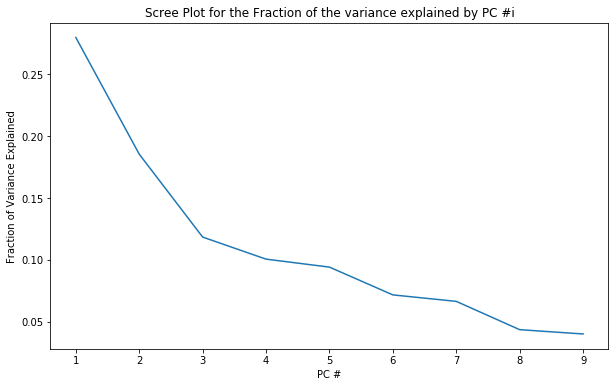

In [92]:
figure(figsize=(10,6))
xx = list(range(1, s.shape[0]+1))
plt.plot(xx, s**2 / sum(s**2));
plt.xticks(xx, xx);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained')
plt.title("Scree Plot for the Fraction of the variance explained by PC #i");

In [93]:
pcs = data_centered_scaled@vt.T
dat_1st_2_pcs_scaled = pd.DataFrame({'pc1': pcs.iloc[:,0], 'pc2':  pcs.iloc[:,1],
                                     'pc3': pcs.iloc[:,2],
                                    'contraceptive':response})

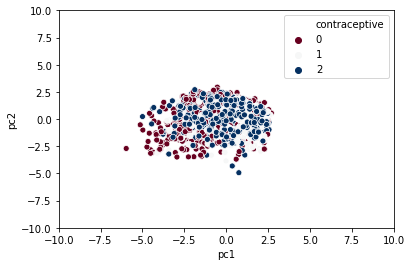

In [94]:
sns.scatterplot(data = dat_1st_2_pcs_scaled, 
                x = 'pc1', 
                y = 'pc2', 
                hue = 'contraceptive', palette = "RdBu")
plt.gca().set_xlim(-10, 10);
plt.gca().set_ylim(-10, 10);

In [95]:
fig = px.scatter_3d(dat_1st_2_pcs_scaled, 
                    x='pc1', y='pc2', z='pc3', 
                    range_x = [-10, 10], 
                    range_y = [-10, 10], 
                    range_z = [-10, 10], 
                    color = 'contraceptive', 
                    color_continuous_scale = 'RdBu');
fig.show();

In [96]:
# redefine the categories of y
data_2 = data.replace({2: 1})
response_2 = data_2['contraceptive']
x_2 = data_2.drop("contraceptive", axis=1)
data_centered_scaled_2 = x_2 - np.mean(x_2,axis=0)
data_centered_scaled_2 = data_centered_scaled_2.div(np.std(data_centered_scaled_2), axis=1)
response_2.head()

0    0
1    0
2    0
3    0
4    0
Name: contraceptive, dtype: int64

In [99]:
u_2, s_2, vt_2 = np.linalg.svd(data_centered_scaled_2, full_matrices = False)
pcs_2 = data_centered_scaled_2@vt_2.T
dat_1st_2_pcs_scaled_2 = pd.DataFrame({'pc1': pcs_2.iloc[:,0], 'pc2':  pcs_2.iloc[:,1],
                                     'pc3': pcs_2.iloc[:,2],
                                    'contraceptive':response_2})

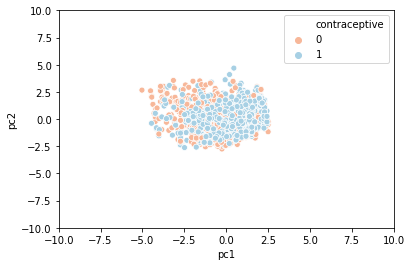

In [98]:
sns.scatterplot(data = dat_1st_2_pcs_scaled_2, 
                x = 'pc1', 
                y = 'pc2', 
                hue = 'contraceptive', palette = "RdBu")
plt.gca().set_xlim(-10, 10);
plt.gca().set_ylim(-10, 10);

In [133]:
fig = px.scatter_3d(dat_1st_2_pcs_scaled_2, 
                    x='pc1', y='pc2', z='pc3', 
                    range_x = [-10, 10], 
                    range_y = [-10, 10], 
                    range_z = [-10, 10], 
                    color = 'contraceptive', 
                    color_continuous_scale = 'RdBu');
fig.show();

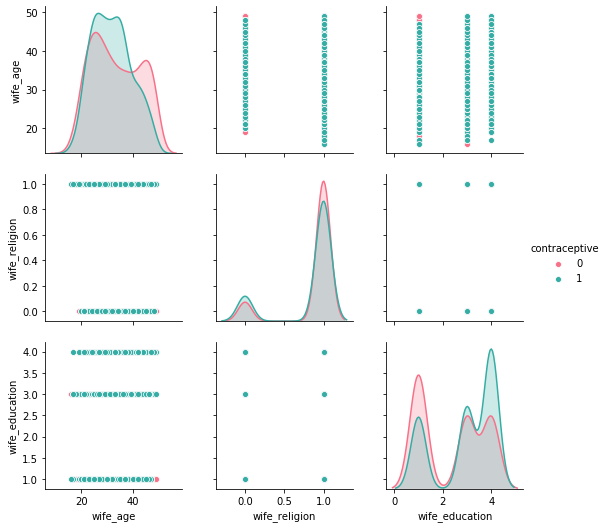

In [131]:
sns.pairplot(data_2, hue="contraceptive", 
             vars=["wife_age", "wife_religion", "wife_education"], 
             palette="husl")

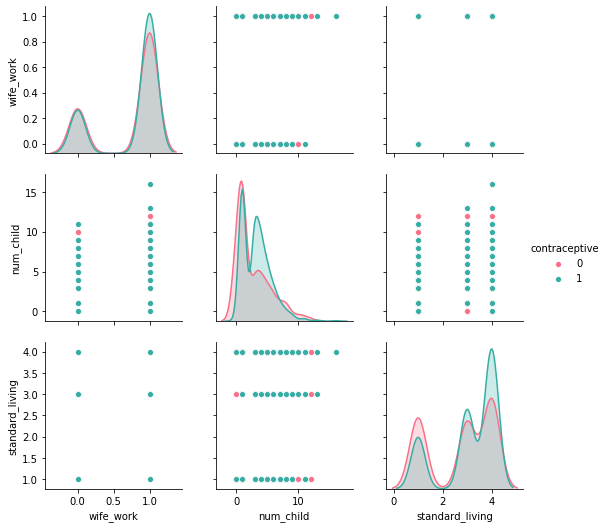

In [127]:
sns.pairplot(data_2, hue="contraceptive", 
             vars=["wife_work","num_child","standard_living"], 
             palette="husl")

In [ ]:
corr = image1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatco = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Engineering
1. Normalization 
2. Log transformed some features
3. Age seperate into bins
4. Drop Useless Features
5. Simplify Features Categories

# Model Building

In [116]:
x_train, x_test,y_train,y_test = train_test_split(x_2,response_2, test_size=0.25, 
                                                  random_state=2938)

print("Training Data Size:", {len(x_train)})
print("Test Data Size:", {len(x_test)})

Training Data Size: {1104}
Test Data Size: {369}


In [117]:
# logistic regression based on raw features
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True)

lr.fit(x_train,y_train)
model_predicted_train = lr.predict(x_train)
model_predicted_test = lr.predict(x_test)
train_accuracy = 1/(x_train.shape[0])*np.sum(y_train==model_predicted_train)
test_accuracy = 1/(x_test.shape[0])*np.sum(y_test==model_predicted_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.6730
Test accuracy: 0.6504


/Users/angelynaye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

